In [1]:
import sys
import os
dir = os.path.abspath('')
while not dir.endswith('ardt'): dir = os.path.dirname(dir)
if not dir in sys.path: sys.path.append(dir)

In [2]:
from datasets import load_from_disk

from utils.helpers import find_root_dir

import numpy as np
import seaborn as sns

In [3]:
ARDT_DIR = find_root_dir()
dataset_name = "ppo_randadv_eval_halfcheetah"

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

/Users/afonsosamarques/.virtualenvs/fp-adt/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


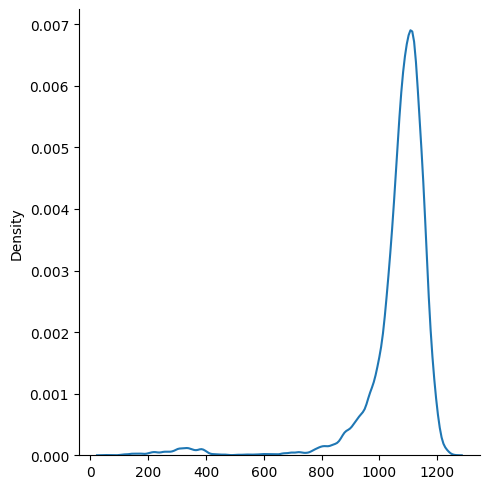

In [4]:
def compute_sum(ds):
    return {'returns': sum(ds['rewards'])}

ds = load_from_disk(f"{ARDT_DIR}/datasets/{dataset_name}")
ds = ds.map(compute_sum)
sns.displot(ds['returns'], kind="kde", bw_adjust=0.5);

Filter:   0%|          | 0/10000 [00:00<?, ? examples/s]

Size of dataset:  7318


/Users/afonsosamarques/.virtualenvs/fp-adt/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


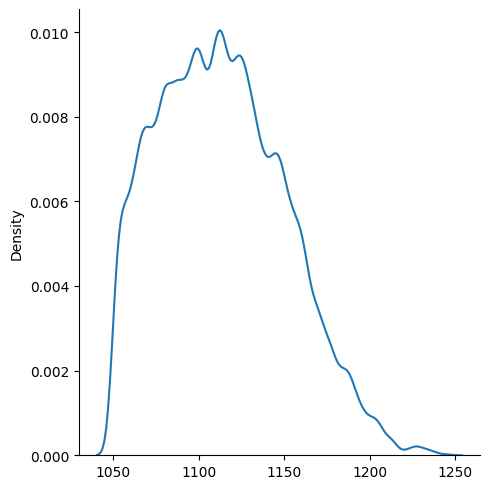

In [6]:
min_return = 1050
max_return = 1250
filtered_ds = ds.filter(lambda x: x['returns'] > min_return and x['returns'] < max_return)
print("Size of dataset: ", len(filtered_ds))
sns.displot(filtered_ds['returns'], kind="kde", bw_adjust=0.5);

In [21]:
idx = list(range(len(filtered_ds)))
np.random.shuffle(idx)
idx = idx[:1000]
len(idx)

1000

In [22]:
filtered_ds.select(idx).save_to_disk(f"{ARDT_DIR}/datasets/{dataset_name}_filtered")

Saving the dataset (0/1 shards):   0%|          | 0/1000 [00:00<?, ? examples/s]